# King James Word Analysis

### In this notebook we attempt to view interesting data/statistics from the words in the KJV of the bible
1. Is it Zipfy? (https://en.wikipedia.org/wiki/Zipf%27s_law)
2. What word is used most?
3. What word is used least?
4. How many different words are used?
5. Which Characters are used Most and how Frequent?

To accomplish this, we must do a few things first:
1. Acquire a .txt file of the bible 
(http://www.gutenberg.org/ebooks/10)
2. Clean the data then create a CSV file of the data so we don't have to repeat the calculations every time
3. Do EDA on the data
4. Create graphs and do whatever else.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [2]:
with open('nkjv.txt','r') as file:
    text = file.read().replace('\n', ' ')

In [3]:
def clean_data(data, char=False):
    """
    We use regular expressions to get rid of all the verse chapter pairs (example 23:11) then regular string methods to
    replace all the rest of the punctuation, then we put everything in lowercase so we don't count words that start
    a sentance twice
    """
    data = re.sub(r'\d+:\d+', ' ',data)
    if char:
        return data.lower()
    else:
        punc = ['.',',',';',':',')','(','!','?','"','ï»¿','*']
        for i in punc:
            data = data.replace(i,'')
        return data.lower()

In [4]:
data = clean_data(text)
data_list = data.split()
unique_words = set(data_list)

char_data = clean_data(text,char=True)
unique_char = list(set(char_data))

In [5]:
len(data_list),len(unique_words),len(char_data),len(unique_char)

(790017, 12860, 4229002, 41)

In [6]:
def make_dictionary(words,unique):
    """
    This is the function that originally created the counter dictionary that we used to make our CSV file, becuase it 
    takes a while to run I only ran this initially and used the CSV file for all future analysis
    """
    counter_dictionary = {}
    for word in unique:
        counter_dictionary[word] = words.count(unique)
    return counter_dictionary

# If someone in the Future is running this for themselves just remove the comment on the next line
# counter_dictionary = make_dictionary(data_list,unique_words)

In [7]:
def make_csv(dictionary):
    """
    This simply takes the make_dictionary function and returns a usable CSV file so it doesn't have to rerun all
    the calculations every time I would like to open this file
    """
    counts= [list(x) for x in counter_dictionary.items()]
    df = pd.DataFrame(counts,columns=['words','count'])
    df.to_csv('word_count.csv',index=False)
# make_csv(counter_dictionary)

In [8]:
# This creates my df object made from the previous functions and adds on some useful columns
df = pd.read_csv('word_count.csv')
df.sort_values(by='count',inplace=True,ascending=False)
df.reset_index(drop=True,inplace=True)

percent = [(x/len(data_list))*100 for x in df['count']]
df['%'] = percent

cumulative_sum = df['%'].cumsum()
df['cs'] = cumulative_sum

In [9]:
df.head()

,words,count,%,cs
0,the,64020,8.103623,8.103623
1,and,51696,6.543657,14.647280
2,of,34668,4.388260,19.035540
3,to,13580,1.718950,20.754490
4,that,12912,1.634395,22.388885


In [10]:
percentages = [x for x in df['%']]
words = [x for x in df['words']]

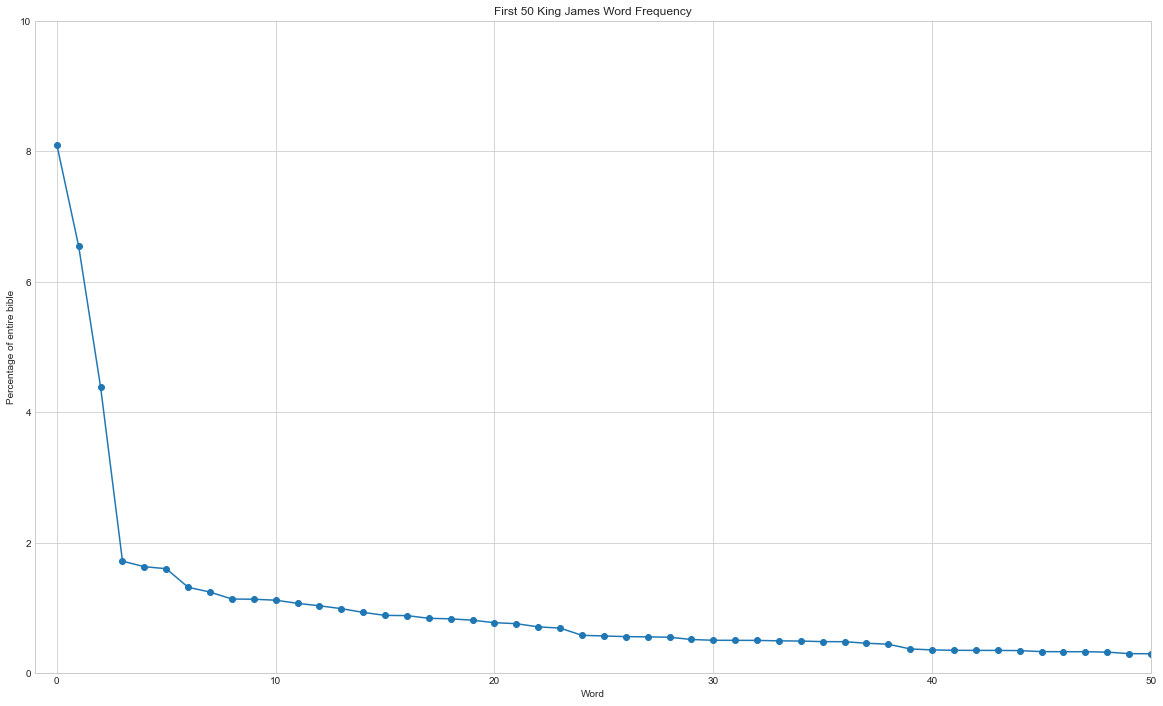

In [11]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,12))
plt.plot(percentages,marker='o')
plt.axis([-1,50,0,10])
plt.title('First 50 King James Word Frequency')
plt.xlabel('Word')
plt.ylabel('Percentage of entire bible');

In [12]:
df.loc[df['cs'] >= 50].head(1)
# only 41 words account for over half of the bible!

,words,count,%,cs
41,this,2785,0.352524,50.004367


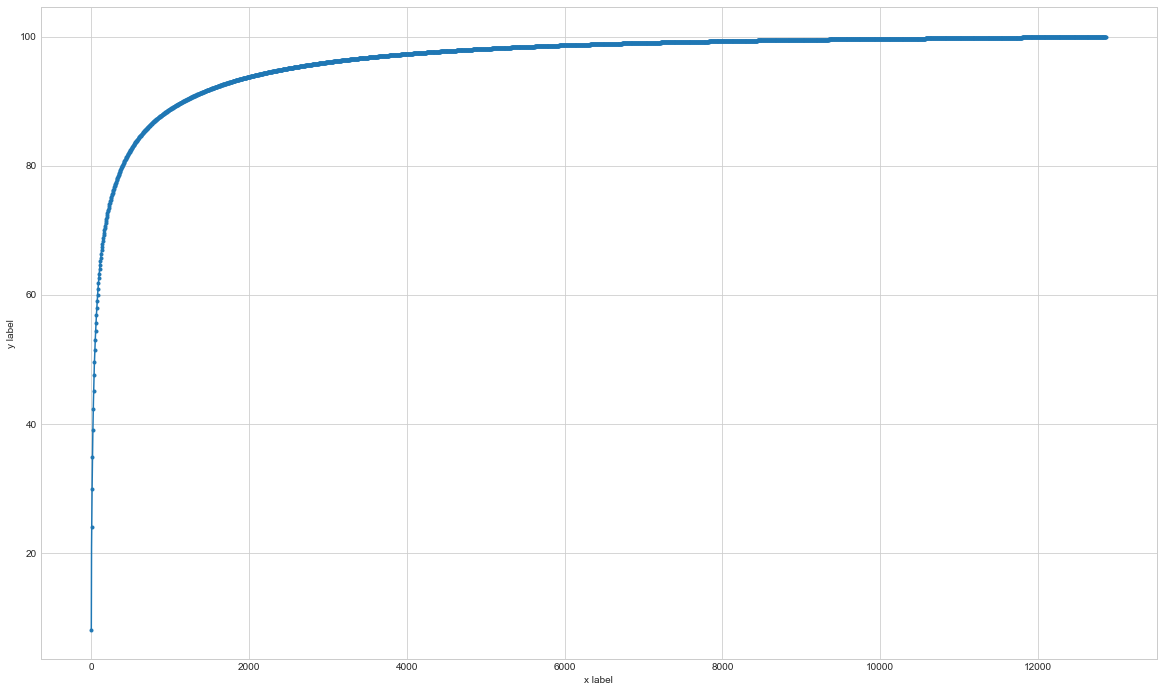

In [13]:
ax = df['cs'].plot(style='.-',markevery=5,figsize=(20,12));
ax.set_xlabel("x label")
ax.set_ylabel("y label");

In [14]:
# We can use this cell to check out some individual words by replacing anything after the equality
df.loc[df['words'] == 'seven']

,words,count,%,cs
206,seven,463,0.058606,72.697043


In [15]:
# We can check how many words share the same count
len(df.loc[df['count'] == 1])

4100

In [16]:
t1,t2 = [],[]
for i in range(1,1000):
    t1.append(i)
    t2.append(len(df.loc[df['count'] == i]))

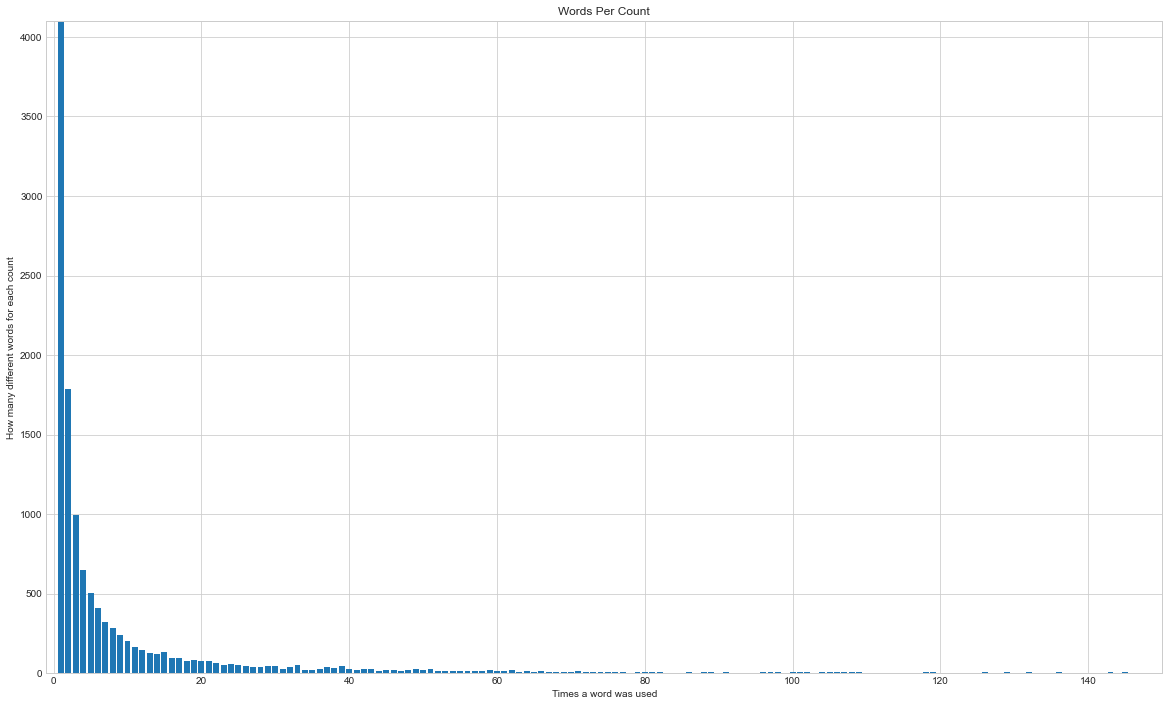

In [17]:
plt.figure(figsize=(20,12))
plt.bar(t1,t2)
plt.axis([-1,150,0,4100])
plt.title('Words Per Count')
plt.xlabel('Times a word was used')
plt.ylabel('How many different words for each count');

In [18]:
def make_char_dataframe(data,unique):
    character_dictionary = {}
    for char in unique:
        character_dictionary[char] = data.count(char)
    df = pd.DataFrame([list(x) for x in character_dictionary.items()],columns=['char','frequency'])
    df.sort_values(by='frequency',inplace=True,ascending=False)
    df.reset_index(drop=True,inplace=True)
    return df

In [19]:
cf = make_char_dataframe(char_data,unique_char)
cf['%'] = [x/len(char_data)*100 for x in cf['frequency']]
cf['c%'] = cf['%'].cumsum()

In [20]:
cf

,char,frequency,%,c%
0,,879099,20.787387,20.787387
1,e,410407,9.704583,30.491970
2,t,316225,7.477533,37.969502
3,h,282154,6.671881,44.641383
4,a,274726,6.496237,51.137621
5,o,241850,5.718843,56.856464
6,n,224030,5.297467,62.153931
7,i,192838,4.559894,66.713825
8,s,189267,4.475453,71.189278
9,r,169168,4.000187,75.189466


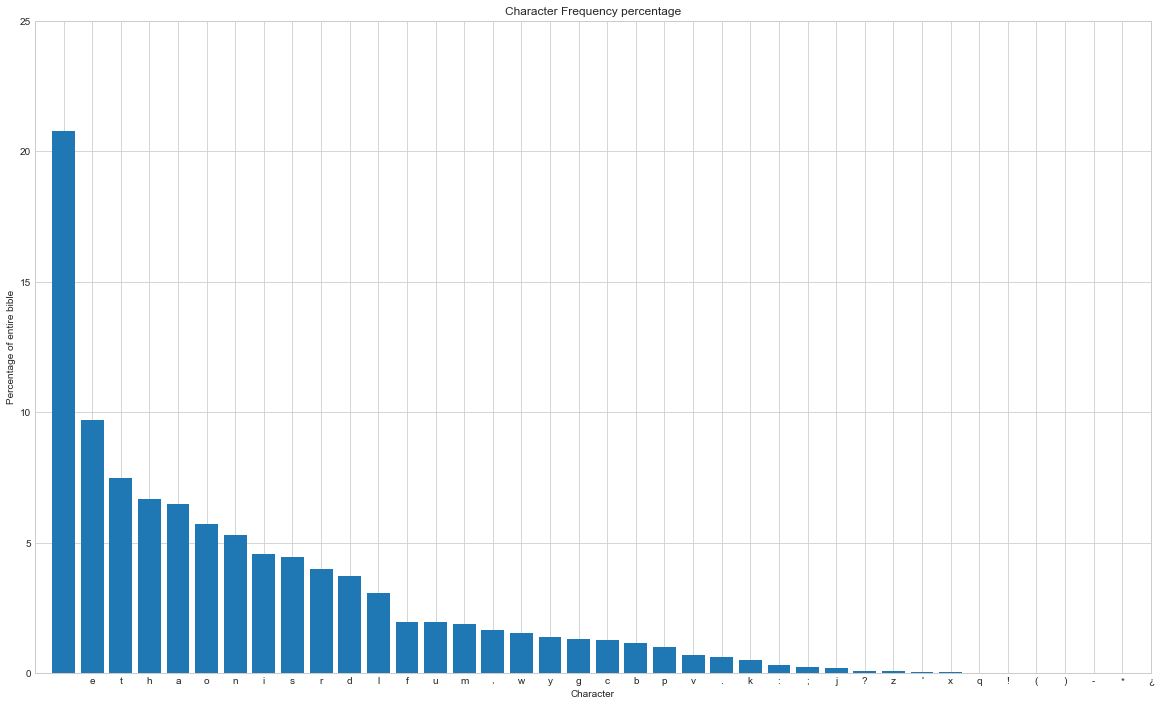

In [21]:
plt.figure(figsize=(20,12))
plt.bar(cf['char'],cf['%'])
plt.axis([-1,38,0,25])
plt.title('Character Frequency percentage')
plt.xlabel('Character')
plt.ylabel('Percentage of entire bible');